In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
test_results = pd.read_csv("test_results.csv")
user_table = pd.read_csv("user_table.csv")

In [5]:
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [6]:
user_table.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


# Data Processing & Cleaning

### Find the overlap of users in both datasets

In [7]:
print("Number of users in test results:",len(test_results["user_id"].unique()))
print("Number of users in user_table: ",len(user_table["user_id"].unique()))

Number of users in test results: 316800
Number of users in user_table:  275616


In [8]:
shared_user_position = np.union1d(test_results["user_id"].unique(),user_table["user_id"].unique())
not_shared_user_position = np.intersect1d(test_results["user_id"].unique(),user_table["user_id"].unique())


In [9]:
user_table["user_id"][~pd.Series(user_table["user_id"].unique()).isin(pd.Series(test_results["user_id"].unique()))]


Series([], Name: user_id, dtype: int64)

In [10]:
user_table["user_id"].unique() not in test_results["user_id"].unique()

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


True

### Basic stat information about certain columns

In [11]:
test_results["test"].value_counts()

0    202727
1    114073
Name: test, dtype: int64

In [12]:
user_table["country"].value_counts()

USA    275616
Name: country, dtype: int64

In [13]:
user_table["city"].value_counts()

New York       25748
Chicago         7153
Houston         6706
San Antonio     4633
Los Angeles     4141
               ...  
Cerritos           1
East Lake          1
Costa Mesa         1
New Milford        1
Ocala              1
Name: city, Length: 923, dtype: int64

In [14]:
test_results["source"].value_counts()

direct_traffic     60357
ads-google         59379
ads_facebook       53396
ads_other          29876
seo-google         23175
ads-bing           22873
seo_facebook       21205
friend_referral    20695
seo-other           9260
ads-yahoo           7583
seo-yahoo           6848
seo-bing            2153
Name: source, dtype: int64

In [15]:
test_results["device"].value_counts()

mobile    186471
web       130329
Name: device, dtype: int64

In [16]:
test_results["operative_system"].value_counts()

windows    100976
iOS         95465
android     74935
mac         25085
other       16204
linux        4135
Name: operative_system, dtype: int64

# Visualization for Test Results

## Visualization on the price's impact on conversion
## Check for distribution among other factors, like device, source, etc, to ensure there is no other influence on conversion.

<BarContainer object of 12 artists>

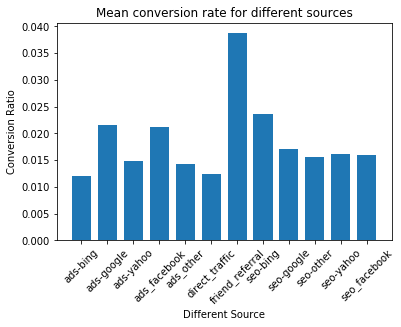

In [17]:
source = list(test_results.groupby(["source"]).mean().index)
source_mean_test = test_results.groupby(["source"]).mean()["converted"].values
position = np.linspace(0,len(source_mean_test),len(source_mean_test))
plt.title("Mean conversion rate for different sources")
plt.xlabel("Different Source")
plt.ylabel("Conversion Ratio")
plt.xticks(position,source,rotation=45)

plt.bar(position,source_mean_test)

In [18]:
test_results.head(1)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0


<BarContainer object of 2 artists>

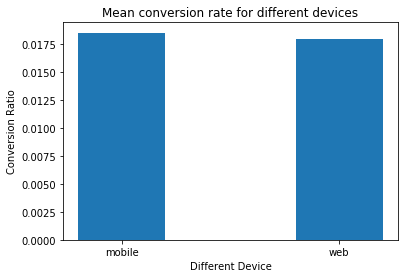

In [19]:
device = list(test_results.groupby(["device"]).mean().index)
device_mean_test = test_results.groupby(["device"]).mean()["converted"].values
position = np.linspace(0,len(device_mean_test),len(device_mean_test))
plt.title("Mean conversion rate for different devices")
plt.xlabel("Different Device")
plt.ylabel("Conversion Ratio")
plt.xticks(position,device)

plt.bar(position,device_mean_test)

<BarContainer object of 6 artists>

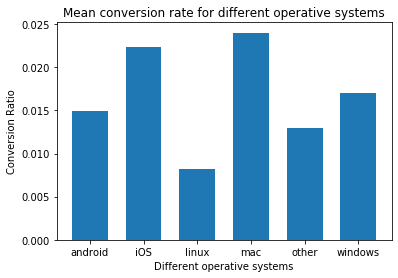

In [20]:
OS = list(test_results.groupby(["operative_system"]).mean().index)
OS_mean_test = test_results.groupby(["operative_system"]).mean()["converted"].values
position = np.linspace(0,len(OS_mean_test),len(OS_mean_test))
plt.title("Mean conversion rate for different operative systems")
plt.xlabel("Different operative systems")
plt.ylabel("Conversion Ratio")
plt.xticks(position,OS)

plt.bar(position,OS_mean_test)

### As we can see from the above graph, the conversion ratio for different sources and operative systems vary a lot while it stays almost the same for two different devices.
### And these are the factors that we need to consider when comparing the impact of two pricing strategy.
### Now I need to examine whether the distribution of control and experiment gourps are similar for different sources and operative systems.

#### Examine the conversion ratio for different operative systems

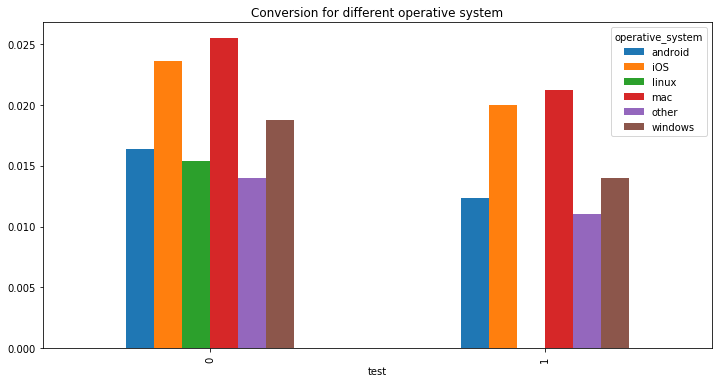

In [51]:
OS_conversion = test_results.groupby(['test',"operative_system"])["converted"].mean().unstack()
fig, ax = plt.subplots(figsize=(12, 6))
OS_conversion.plot(kind='bar', ax=ax)
plt.title("Conversion for different operative system")

plt.show()


#### Examine the distribution for different operative systems

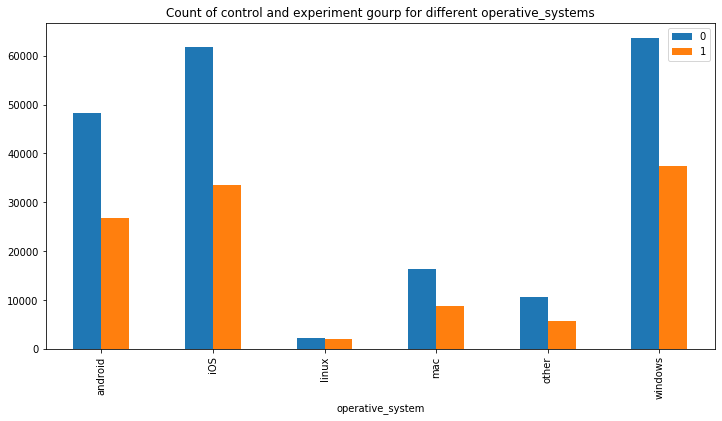

In [37]:
OS_test_count = test_results.groupby(['operative_system'])['test'].apply(lambda x: x.value_counts()).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
OS_test_count.plot(kind='bar', ax=ax)
plt.title("Count of control and experiment gourp for different operative_systems")

plt.show()


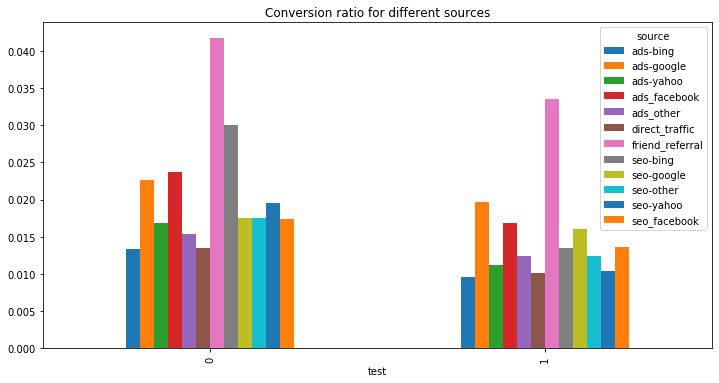

In [52]:
source_conversion = test_results.groupby(['test',"source"])["converted"].mean().unstack()
fig, ax = plt.subplots(figsize=(12, 6))
source_conversion.plot(kind='bar', ax=ax)
plt.title("Conversion ratio for different sources")

plt.show()


#### Examine the distribution for different sources

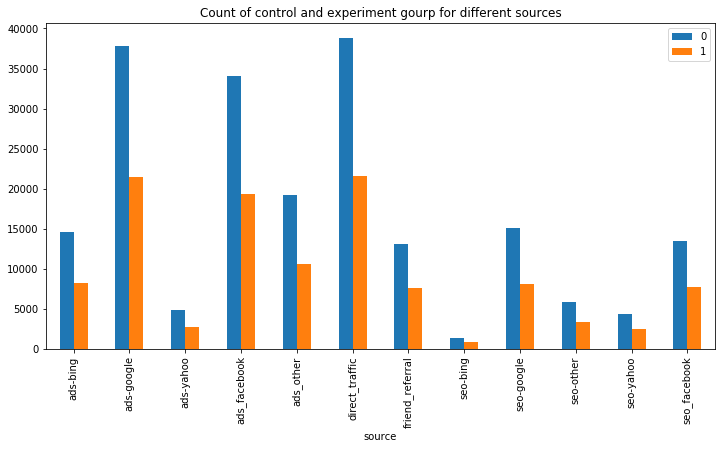

In [22]:
source_test_count = test_results.groupby(['source'])['test'].apply(lambda x: x.value_counts()).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
source_test_count.plot(kind='bar', ax=ax)
plt.title("Count of control and experiment gourp for different sources")

plt.show()

#### Examine the distribution for different devices

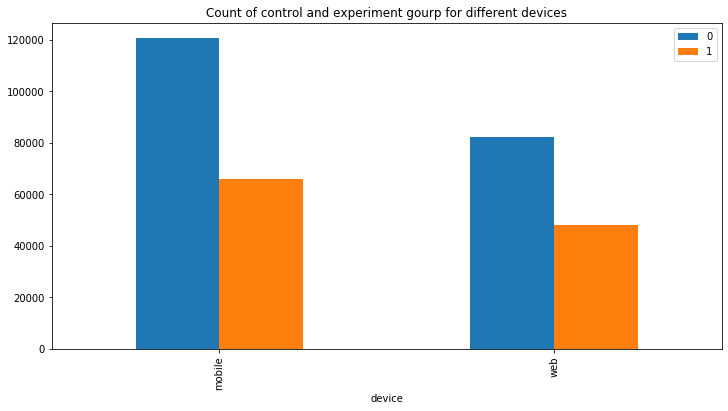

In [27]:
device_test_count = test_results.groupby(['device'])['test'].apply(lambda x: x.value_counts()).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
device_test_count.plot(kind='bar', ax=ax)
plt.title("Count of control and experiment gourp for different devices")

plt.show()

### As we can see from the above graph that almost for all sources the number of users in control group is larger than the number of users in experiment group.
### So we need to examine whether the difference between control and experiment groups stay the at the same level for other when group by other factors.

#### Examine difference between two groups when group by source

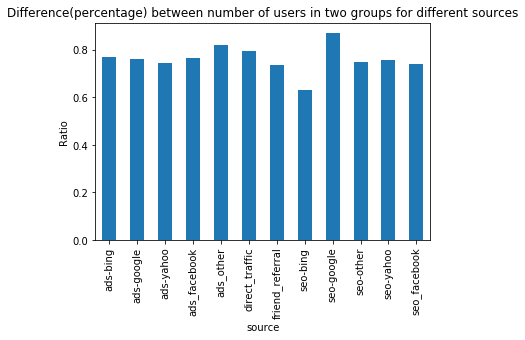

In [23]:
difference_ratio_source = (source_test_count[0] - source_test_count[1])/source_test_count[1]
difference_ratio_source.plot(kind="bar")
plt.title("Difference(percentage) between number of users in two groups for different sources")
plt.ylabel("Ratio")
plt.show()

#### Examine difference between two groups when group by operative systems

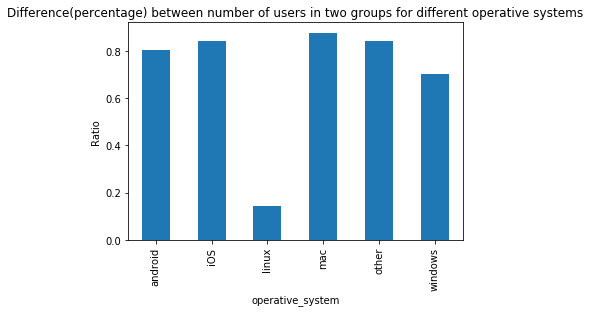

In [28]:
difference_ratio_OS = (OS_test_count[0] - OS_test_count[1])/OS_test_count[1]
difference_ratio_OS.plot(kind="bar")
plt.title("Difference(percentage) between number of users in two groups for different operative systems")
plt.ylabel("Ratio")
plt.show()

#### Examine difference between two groups when group by devices

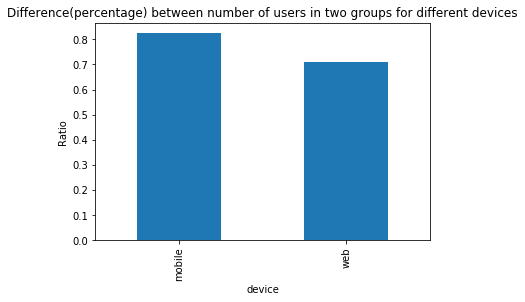

In [30]:
difference_ratio_device = (device_test_count[0] - device_test_count[1])/device_test_count[1]
difference_ratio_device.plot(kind="bar")
plt.title("Difference(percentage) between number of users in two groups for different devices")
plt.ylabel("Ratio")
plt.show()

### As we can see the difference between these two groups stay almost the same except for some groups, like linux.
### And this could also has an impact on the final results.

# Results for Pricing Strategy

In [24]:
test_results.loc[:,['test', 'converted']].groupby('test').mean()


,converted
test,
0,0.019904
1,0.015543


#### For converted customers, the price can become revenue.

In [26]:
test_results["revenue"] = test_results["price"] * test_results["converted"]
test_results.loc[:,['test', 'revenue']].groupby('test').mean()


,revenue
test,
0,0.776734
1,0.916843


### As we can see, although the conversion ratio of control group is higher, the average revenue for test group is higher
### Now we need to conduct a statistical test to see whether there is a difference between control and experiment regarding conversion and revenue.

In [ ]:
from scipy.stats import ttest_ind


### Null hypothesis: The difference between control and experiment groups is 0.
### Alternative hypothesis: The difference between control and experiment groups is not 0.

In [33]:
critical_value = test_results[test_results['test'] == 0]['revenue'].values
expected_value = test_results[test_results['test'] == 1]['revenue'].values
print(ttest_ind(critical_value, expected_value, axis=0, equal_var=False))

Ttest_indResult(statistic=-5.657213077474457, pvalue=1.5407498604678382e-08)


### The p-value is very small so at any reasonable significant level, we are confident to reject the null hypothesis

### Now we need to test from a conversion perspective, whether the control group is better.

### Null hypothesis: The difference between control and experiment groups is 0.
### Alternative hypothesis: The difference between control and experiment groups is not 0.

In [53]:
critical_value = test_results[test_results['test'] == 0]['converted'].values
expected_value = test_results[test_results['test'] == 1]['converted'].values
print(ttest_ind(critical_value, expected_value, axis=0, equal_var=False))

Ttest_indResult(statistic=9.08604644689466, pvalue=1.0339496325938204e-19)


### The p-value is very small so at any reasonable significant level, we are confident to reject the null hypothesis

### The conclusion is that a higher price will decrease the conversion rate but will increase the revenue because each conversion will give the company more revenue.
### Choosing between two strategies really depends on the company's current status and overall strategy. If the company is in its expansion stage, which means it needs to acquire more users then a lower price is better. If the company's goal is gain more profits, then a higher price would be better.